# Linear SVM

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import sklearn.svm
import seaborn as sns
import scipy.io as sio
import matplotlib.pyplot as plt

In [3]:
mat = sio.loadmat('data/ex6data1.mat')
print(mat.keys())
data = pd.DataFrame(mat.get('X'), columns=['X1', 'X2'])
data['y'] = mat.get('y')

data.head()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


,X1,X2,y
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


## Visualize Data

Text(0, 0.5, 'X2')

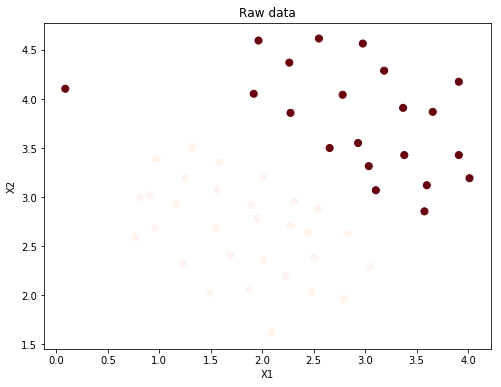

In [5]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(data['X1'], data['X2'], s=50, c=data['y'], cmap='Reds')
ax.set_title('Raw data')
ax.set_xlabel('X1')
ax.set_ylabel('X2')

In [6]:
svc1 = sklearn.svm.LinearSVC(C=1, loss='hinge')
svc1.fit(data[['X1', 'X2']], data['y'])
svc1.score(data[['X1', 'X2']], data['y'])

/home/singhals/anaconda2/envs/MaskRCNN/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9803921568627451

In [7]:
data['SVM1 Confidence'] = svc1.decision_function(data[['X1', 'X2']])

Text(0.5, 1.0, 'SVM (C=1) Decision Confidence')

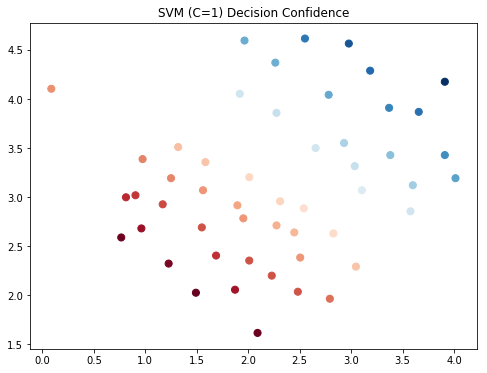

In [8]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM1 Confidence'], cmap='RdBu')
ax.set_title('SVM (C=1) Decision Confidence')

In [9]:
svc100 = sklearn.svm.LinearSVC(C=100, loss='hinge')
svc100.fit(data[['X1', 'X2']], data['y'])
svc100.score(data[['X1', 'X2']], data['y'])

/home/singhals/anaconda2/envs/MaskRCNN/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9411764705882353

In [10]:
data['SVM100 Confidence'] = svc100.decision_function(data[['X1', 'X2']])

Text(0.5, 1.0, 'SVM (C=100) Decision Confidence')

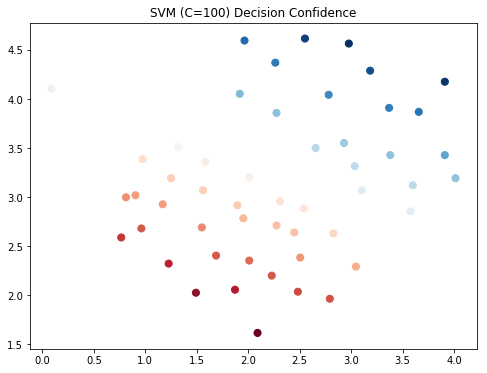

In [11]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM100 Confidence'], cmap='RdBu')
ax.set_title('SVM (C=100) Decision Confidence')

In [12]:
data.head()

,X1,X2,y,SVM1 Confidence,SVM100 Confidence
0,1.9643,4.5957,1,0.801431,4.471674
1,2.2753,3.8589,1,0.383430,2.503456
2,2.9781,4.5651,1,1.376106,5.601602
3,2.9320,3.5519,1,0.521059,2.321492
4,3.5772,2.8560,1,0.334156,0.888012


# Gaussian kernels

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import svm

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.io as sio

In [15]:
# kernek function
def gaussian_kernel(x1, x2, sigma):
    return np.exp(- np.power(x1 - x2, 2).sum() / (2 * (sigma ** 2)))

In [16]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2

gaussian_kernel(x1, x2, sigma)

0.32465246735834974

In [17]:
mat = sio.loadmat('data/ex6data2.mat')
print(mat.keys())
data = pd.DataFrame(mat.get('X'), columns=['X1', 'X2'])
data['y'] = mat.get('y')

data.head()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


,X1,X2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1


/home/singhals/anaconda2/envs/MaskRCNN/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


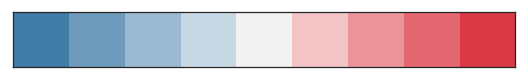

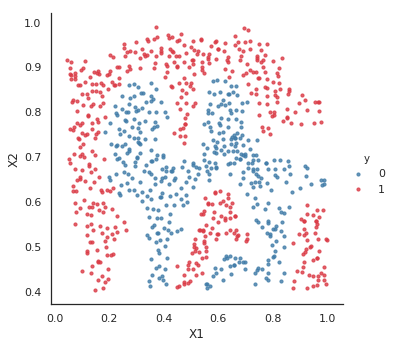

In [19]:
sns.set(context="notebook", style="white", palette=sns.palplot(sns.diverging_palette(240, 10, n=9)))
sns.lmplot('X1', 'X2', hue='y', data=data, 
           size=5, 
           fit_reg=False, 
           scatter_kws={"s": 10}
          )

In [20]:
svc = svm.SVC(C=100, kernel='rbf', gamma=10, probability=True)
svc

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
svc.fit(data[['X1', 'X2']], data['y'])
svc.score(data[['X1', 'X2']], data['y'])

0.9698725376593279

In [22]:
predict_prob = svc.predict_proba(data[['X1', 'X2']])[:, 0]

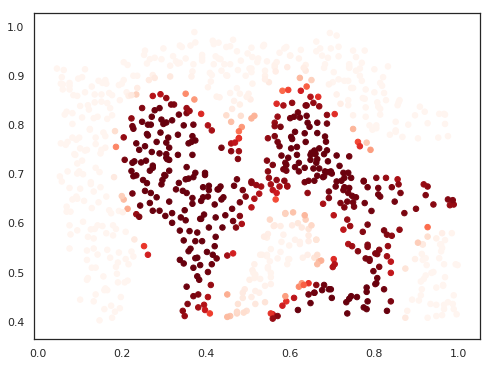

In [23]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(data['X1'], data['X2'], s=30, c=predict_prob, cmap='Reds')

# search for the best parameters

In [26]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import numpy as np
import pandas as pd
import scipy.io as sio

In [27]:
mat = sio.loadmat('data/ex6data3.mat')
print(mat.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'yval', 'Xval'])


In [28]:
training = pd.DataFrame(mat.get('X'), columns=['X1', 'X2'])
training['y'] = mat.get('y')

cv = pd.DataFrame(mat.get('Xval'), columns=['X1', 'X2'])
cv['y'] = mat.get('yval')

In [29]:
print(training.shape)
training.head()

(211, 3)


,X1,X2,y
0,-0.158986,0.423977,1
1,-0.347926,0.470760,1
2,-0.504608,0.353801,1
3,-0.596774,0.114035,1
4,-0.518433,-0.172515,1


In [30]:
candidate = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]

In [31]:
# gamma to comply with sklearn parameter name
combination = [(C, gamma) for C in candidate for gamma in candidate]
len(combination)

81

In [32]:
search = []

for C, gamma in combination:
    svc = svm.SVC(C=C, gamma=gamma)
    svc.fit(training[['X1', 'X2']], training['y'])
    search.append(svc.score(cv[['X1', 'X2']], cv['y']))

In [33]:
best_score = search[np.argmax(search)]
best_param = combination[np.argmax(search)]

print(best_score, best_param)

0.965 (0.3, 100)


In [34]:
best_svc = svm.SVC(C=100, gamma=0.3)
best_svc.fit(training[['X1', 'X2']], training['y'])
ypred = best_svc.predict(cv[['X1', 'X2']])

print(metrics.classification_report(cv['y'], ypred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       113
           1       0.94      0.89      0.91        87

   micro avg       0.93      0.93      0.93       200
   macro avg       0.93      0.92      0.92       200
weighted avg       0.93      0.93      0.92       200



# sklearn `GridSearchCV`

In [36]:
parameters = {'C': candidate, 'gamma': candidate}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters, n_jobs=-1)
clf.fit(training[['X1', 'X2']], training['y'])

/home/singhals/anaconda2/envs/MaskRCNN/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/singhals/anaconda2/envs/MaskRCNN/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100], 'gamma': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [37]:
clf.best_params_

{'C': 10, 'gamma': 30}

In [38]:
clf.best_score_

0.9004739336492891

In [39]:
ypred = clf.predict(cv[['X1', 'X2']])
print(metrics.classification_report(cv['y'], ypred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       113
           1       0.95      0.93      0.94        87

   micro avg       0.95      0.95      0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



In [52]:
# Spam

In [41]:
from sklearn import svm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

import scipy.io as sio

In [42]:
mat_tr = sio.loadmat('data/spamTrain.mat')
mat_tr.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [43]:
X, y = mat_tr.get('X'), mat_tr.get('y').ravel()
X.shape, y.shape

((4000, 1899), (4000,))

In [44]:
mat_test = sio.loadmat('data/spamTest.mat')
mat_test.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Xtest', 'ytest'])

In [45]:
test_X, test_y = mat_test.get('Xtest'), mat_test.get('ytest').ravel()
test_X.shape, test_y.shape

((1000, 1899), (1000,))

In [46]:
## fit SVM model

In [47]:
svc = svm.SVC()

In [48]:
svc.fit(X, y)

/home/singhals/anaconda2/envs/MaskRCNN/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [49]:
pred = svc.predict(test_X)
print(metrics.classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       692
           1       0.98      0.87      0.92       308

   micro avg       0.95      0.95      0.95      1000
   macro avg       0.96      0.93      0.94      1000
weighted avg       0.95      0.95      0.95      1000



In [50]:
logit = LogisticRegression()
logit.fit(X, y)

/home/singhals/anaconda2/envs/MaskRCNN/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [51]:
pred = logit.predict(test_X)
print(metrics.classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       692
           1       0.99      0.99      0.99       308

   micro avg       0.99      0.99      0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000

